The Functions:

In [ ]:
import time
import numpy as np

runtime_array = np.zeros((20, 5))

def HybridSort(A, K):
  n = len(A)
  if n <= K:
    # if the array is under a certain size, use insertion sort
    #this section of code will take over when the subarrrays are relatively small compared to the input size
    return InsertionSort(A)
  else:
    # otherwise use merge sort
    #theoretically, this is called on arrays pre-sorted by insertion sort and we trace calls back up the stack
    return merge(HybridSort(A[:n//2], K), HybridSort(A[n//2:], K))

def InsertionSort(A):
  # Traverse through the array
  for i in range(1, len(A)):
    key = A[i]
    # Move elements of A greater than key one position ahead
    j = i-1
    while j >= 0 and key < A[j] :
        A[j + 1] = A[j] # Shift elements to the right
        j -= 1
    A[j + 1] = key # Insert key in its correct position
  return A

def merge(A, B):
  # Temp arrays to hold the values of arrays A and B
  tempA = [0] * len(A)
  tempB = [0] * len(B)

  # Populate temp arrays
  for i in range(len(A)):
    tempA[i] = A[i]
  for i in range(len(B)):
    tempB[i] = B[i]

  i = 0
  j = 0
  merged_array = []
  while i < len(tempA) and j < len(tempB):
    # Put the smaller value in the array until we are at the end of an array
    if tempA[i] < tempB[j]:
      merged_array.append(tempA[i])
      i += 1
    else:
      merged_array.append(tempB[j])
      j += 1

  # Add in the remaining pieces
  while i < len(tempA):
    merged_array.append(tempA[i])
    i += 1

  while j < len(tempB):
    merged_array.append(tempB[j])
    j += 1
  return merged_array


Now for the verification:

In [ ]:
import random

# Randomly generate arrays
rand_array1 = [random.randint(0, 100) for i in range(50)]
my_sort_rand_array1 = rand_array1.copy()
tim_sort_rand_array1 = rand_array1.copy()
rand_array2 = [random.randint(0, 100) for i in range(50)]
my_sort_rand_array2 = rand_array2.copy()
tim_sort_rand_array2 = rand_array2.copy()

# print out results
print("Test Random Array 1")
print(rand_array1)
print("My function output: ")
print(HybridSort(my_sort_rand_array1, 5))
print("Tim sort output:")
tim_sort_rand_array1.sort()
print(tim_sort_rand_array1)

print("\n Test Random Array 2")
print(rand_array2)
print("My function output: ")
print(HybridSort(my_sort_rand_array2, 5))
print("Tim sort output:")
tim_sort_rand_array2.sort()
print(tim_sort_rand_array2)

# come back to and compare to built in sort


Test Random Array 1
[35, 59, 81, 46, 21, 79, 20, 88, 2, 32, 4, 75, 23, 0, 20, 58, 62, 86, 67, 100, 16, 52, 42, 37, 59, 97, 16, 68, 68, 68, 25, 40, 71, 13, 31, 72, 34, 65, 38, 93, 90, 90, 63, 59, 92, 100, 22, 82, 99, 1]
My function output: 
[0, 1, 2, 4, 13, 16, 16, 20, 20, 21, 22, 23, 25, 31, 32, 34, 35, 37, 38, 40, 42, 46, 52, 58, 59, 59, 59, 62, 63, 65, 67, 68, 68, 68, 71, 72, 75, 79, 81, 82, 86, 88, 90, 90, 92, 93, 97, 99, 100, 100]
Tim sort output:
[0, 1, 2, 4, 13, 16, 16, 20, 20, 21, 22, 23, 25, 31, 32, 34, 35, 37, 38, 40, 42, 46, 52, 58, 59, 59, 59, 62, 63, 65, 67, 68, 68, 68, 71, 72, 75, 79, 81, 82, 86, 88, 90, 90, 92, 93, 97, 99, 100, 100]

 Test Random Array 2
[0, 98, 36, 77, 54, 14, 28, 12, 76, 89, 68, 11, 34, 94, 46, 71, 90, 84, 39, 14, 0, 75, 86, 79, 74, 32, 45, 92, 82, 80, 98, 11, 57, 91, 82, 2, 48, 50, 56, 93, 55, 82, 66, 83, 13, 78, 24, 66, 99, 93]
My function output: 
[0, 0, 2, 11, 11, 12, 13, 14, 14, 24, 28, 32, 34, 36, 39, 45, 46, 48, 50, 54, 55, 56, 57, 66, 66, 68, 71

Deliverable 2: Generate a plot which depicts your algorithm's average running time as a function of K and n on input arrays that you generate randomly

In [ ]:
import random
import time
import matplotlib.pyplot as plt
import numpy as np

# Define the sizes of n
n_sizes = [1000, 2000, 3000, 4000, 5000]

runtime_array1 = np.zeros((20, len(n_sizes)))  # Initialize runtime_array2

sorted_data_list = []

for i in range(20):
    if i == 0:
        k = 2
    else:
        k = (i + 1) * 5

    all_data_list = []  # list to store all_data for this iteration of i
    sorted_data_sublist = []  # list to store sorted_data for this iteration of i

    # generate 10 arrays of different sizes for each n
    for n_size in n_sizes:
        all_data = [] # holds all generated data for a given size n from 1000 to 5000 holding k constant
        sorted_data = []  # list to store sorted_data for the n_sizes across the given k
        for _ in range(10):
            temp_array = [random.randint(0, 1000) for _ in range(n_size)]
            all_data.append(temp_array)
            sorted_data.append(None)  #  initialize the sorted_data list
        all_data_list.append(all_data)  # store all_data for this n_size
        sorted_data_sublist.append(sorted_data)  # store sorted_data for this n_size

    sorted_data_list.append(sorted_data_sublist)  # append the sublist to the main list

    # loop through all_data_list and measure the running time
    for j, all_data in enumerate(all_data_list):
        start_time = time.time_ns()  # To keep track of running time

        # sort each array using HybridSort and measure the running time
        for index, data in enumerate(all_data):
          #sort each sublist in all_data
            start_time = time.time_ns()
            #for each sublist in all_data, append to corresponding sublist in sorted_data_sublist
            sorted_data_sublist[j][index] = HybridSort(data, k)
            end_time = time.time_ns()
            runtime_array1[i][j] += end_time - start_time #add the runtime corresponding slot in runtime array

# calculate the average running times
runtime_array1 /= 10  # NOTE: you can treat Python like MATLAB in this way that's cool


k_values = [(i + 1) * 5 for i in range(20)]

plt.figure(figsize=(12, 6))
for j, n_size in enumerate(n_sizes):
    plt.plot(k_values, runtime_array1[:, j], label=f'n={n_size}')

plt.xlabel('K')
plt.ylabel('Average Running Time (seconds)')
plt.title('Average Running Time of HybridSort vs. K for Different Sizes of N')
plt.legend()
plt.grid(True)
plt.show()



RecursionError: ignored

The relationship betweeen runtime and k appears that runtime decreases when k is mid-sized. That is, somewhere between k = 30 and k = 80. When K is really small (k < 20), runningtime is higher. It is also higher when k gets relatively large (k > 90).

Deliverable 3: Plot the Optimal value of K as a function of array length n. Aka: where does k min occur for a value of n

In [ ]:
# Create a list of min k, n

min_dictionary = {1000:0, 2000:0, 3000:0, 4000:0, 5000:0}

for j in range(5):
  #hold row constant, i.e choose a given n
  # set min equal to the first value in the column
  min_val = runtime_array1[0][j]
  for i in range(20):
    # check for new minimum going down the columns, i.e across all k's
    if runtime_array1[i][j] < min_val:
      #update new minimum
      min_val = runtime_array1[i][j]
      #update corresponding key in dictionary
      min_dictionary[(j+1) * 1000] = (i+1)*5

print(min_dictionary)

{1000: 30, 2000: 20, 3000: 20, 4000: 30, 5000: 35}


Plot:

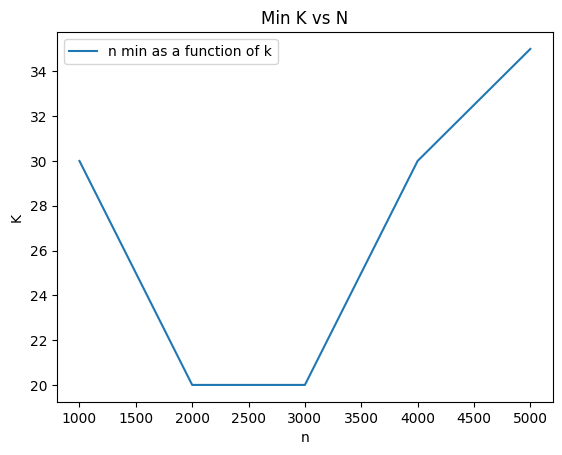

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(min_dictionary.keys(), min_dictionary.values(), label="n min as a function of k")

plt.xlabel("n")
plt.ylabel("K")
plt.title("Min K vs N")
plt.legend()
plt.show()

Deliverable 4: Repeat Deliverables 2, 3 however this time on sorted arrays.

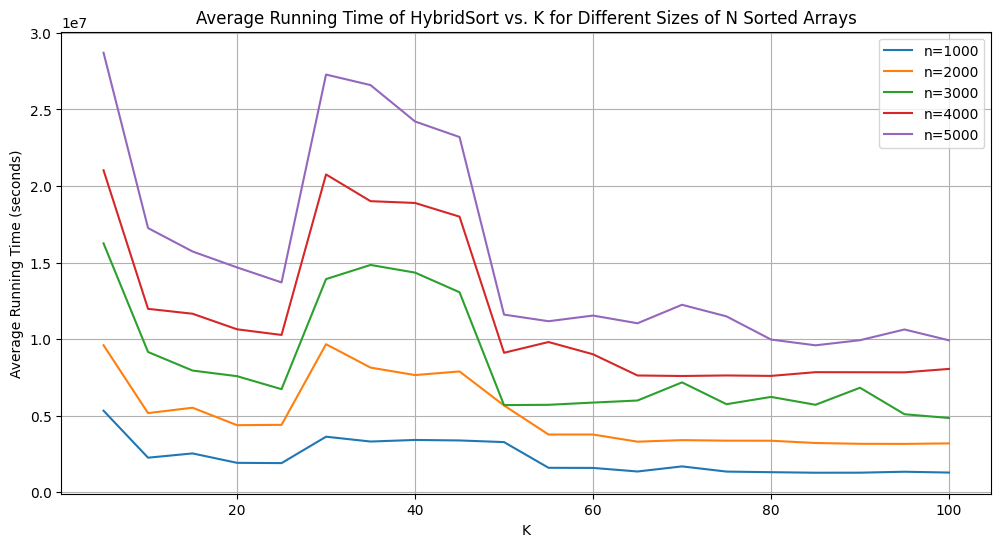

In [ ]:
import random
import time
import matplotlib.pyplot as plt
import numpy as np

# define the sizes of n
n_sizes = [1000, 2000, 3000, 4000, 5000]

runtime_array2 = np.zeros((20, len(n_sizes)))  # initialize runtime_array2

for i in range(20):
    # hold a k row constant and traverse across columns, i.e sizes of n
    if i == 0:
        k = 2
    else:
        k = (i + 1) * 5

    # loop through sorted_data_list created above and measure the running time
    for j, sorted_data in enumerate(sorted_data_sublist):
        start_time = time.time_ns()  # to keep track of running time

        # sort each pre-sorted array using HybridSort and measure the running time
        for data in sorted_data:
            start_time = time.time_ns()
            _ = HybridSort(data, k)  # discard the result since we're only measuring runtime
            end_time = time.time_ns()
            runtime_array2[i][j] += end_time - start_time

# calculate the average running times
runtime_array2 /= 10  # NOTE: you can treat Python like MATLAB in this way that's cool


k_values = [(i + 1) * 5 for i in range(20)]

plt.figure(figsize=(12, 6))
for j, n_size in enumerate(n_sizes):
    plt.plot(k_values, runtime_array2[:, j], label=f'n={n_size}')

plt.xlabel('K')
plt.ylabel('Average Running Time (seconds)')
plt.title('Average Running Time of HybridSort vs. K for Different Sizes of N Sorted Arrays')
plt.legend()
plt.grid(True)
plt.show()


Deliverable 3 Repeat:

In [ ]:
min_dictionary2 = {1000:0, 2000:0, 3000:0, 4000:0, 5000:0}

for j in range(runtime_array2.shape[1]):
  #hold column constant, i.e choose a given n
  # set min equal to the first value in the column
  min_val = runtime_array2[0][j]
  for i in range(runtime_array2.shape[0]):
    # check for new minimum going down the rows, i.e across all k's
    if runtime_array2[i][j] < min_val:
      #update new minimum
      min_val = runtime_array2[i][j]
      #update corresponding key in dictionary
      min_dictionary2[(j+1) * 1000] = (i+1)*5

print(min_dictionary2)

{1000: 85, 2000: 95, 3000: 100, 4000: 70, 5000: 85}


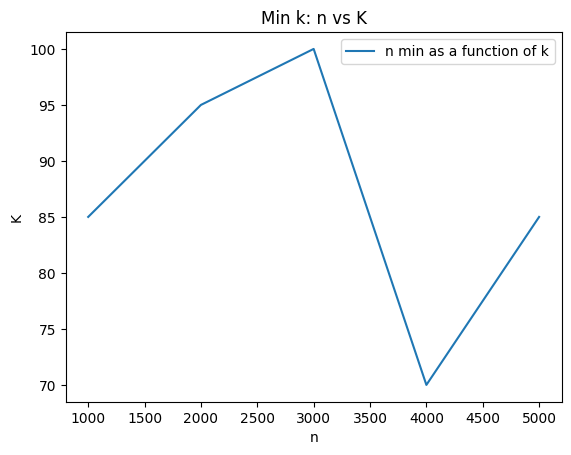

In [ ]:
# Get the number of columns (assuming a 2D array)
num_columns = runtime_array.shape[1]


plt.plot(min_dictionary2.keys(), min_dictionary2.values(), label="n min as a function of k")

plt.xlabel("n")
plt.ylabel("K")
plt.title("Min k vs N")
plt.legend()
plt.show()